C:\Users\jhossain\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Time,Height
0,0.0,0.352810
1,0.1,1.031031
2,0.2,1.999748
3,0.3,3.007179
4,0.4,3.589512
5,0.5,3.579544
6,0.6,4.426018
7,0.7,4.568729
8,0.8,4.843356
9,0.9,5.113120


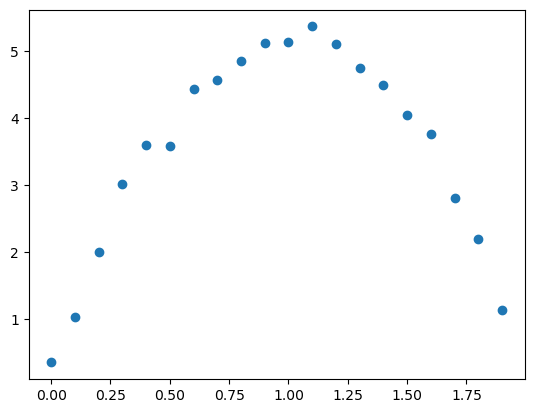

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split # we have to split data set into training and testing 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error #MSE
import matplotlib.pyplot as  plt 
import numpy as np
from sklearn.preprocessing import PolynomialFeatures # to create polynomial features

# Reading data from CSV file (Make sure you have uploaded data set .csv file in your working directory)
data=pd.read_csv('projectile_motion_data.csv') # Created a data frame by reading from csv file 
display(data)
X=data[['Time']] # INPUT Feature (time) 
y=data['Height'] # Actual output (height)
plt.scatter(X,y)


In [3]:
# Split into training and validation sets 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) # random_state =starting state. you will have same test/training set for each run

In [6]:
# Train a linear (D=1) Model and caclulate validation MSE
D=1
my_linear_model = LinearRegression()
my_linear_model.fit(X_train, y_train) # training model usign Xtrain and ytrain

# Printing optimal model trainable parameters
print(f'Coefficients: {my_linear_model.coef_}') # priting trained/optimal coeffs of polynomial terms
print(f'Intercept: {my_linear_model.intercept_}') # trained/optimal wo

# Make prediction using trained model for validation input 
y_pred = my_linear_model.predict(X_val) # Trained model will make prediction for Validation inputs (X_val) 

# Calculate validation MSE and print it 
mse_poly = mean_squared_error(y_val, y_pred) # MSE calculation
print(f"Degree D={D} and validation MSE {mse_poly}")
 


Coefficients: [-0.31052581]
Intercept: 4.243690528861815
Degree D=1 and validation MSE 6.543396068865846


In [7]:
# Train model for various D and calculate corresponding validation MSE   
for D  in [2]:
    poly = PolynomialFeatures(D, include_bias=False) # making polynomial features with Degree D=2
    X_train_poly=poly.fit_transform(X_train) # Making new columns x^2, x^3, x^4...x^D 
    
    # Create and train  model
    my_model = LinearRegression()
    my_model.fit(X_train_poly, y_train) # training model usign Xtrain and ytrain
    # one intercept (wo) and D coeffs (w1, w2,....WD) for polynomial terms 
    print(f'Coefficients: {my_model.coef_}') # priting trained/optimal coeffs of polynomial terms
    print(f'Intercept: {my_model.intercept_}') # trained/optimal wo

    
    # Predictions and evaluation
    X_val_poly=poly.fit_transform(X_val) # Making new columns x^2, x^3, x^4...x^D 
    y_pred = my_model.predict(X_val_poly) # Trained model will make prediction for test inputs (X_test) 

    # Calculate validation MSE and print it 
    mse_poly = mean_squared_error(y_val, y_pred) # MSE calculation
    print(f"Degree D={D} and validation MSE {mse_poly}")


Coefficients: [ 9.76908536 -4.84188768]
Intercept: 0.2692535720383056
Degree D=2 and validation MSE 0.010571599331412933


In [ ]:
Home work Try other values D and select the suitable one. We can discuss tomorrow. 

